In [17]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,BatchNormalization,Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.metrics import SparseCategoricalCrossentropy
from keras.backend import sum, mean, argmax


In [18]:
train = pd.read_csv('train.txt', header = None).to_numpy()
test = pd.read_csv('test.txt', header = None).to_numpy()
val = pd.read_csv('val.txt', header = None).to_numpy()

In [19]:
print(train.shape,test.shape,val.shape)

(20000, 1569) (5000, 1569) (5000, 1569)


In [20]:
import numpy as np
import matplotlib.pyplot as plt

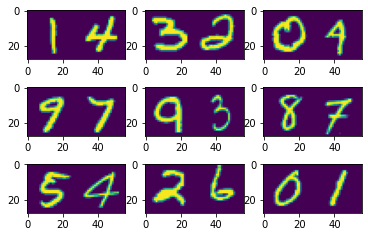

[[ 5.  5.  4.]
 [16. 12. 15.]
 [ 9.  8.  1.]]


In [21]:
#We plot the first 9 observations, and we stretch out the last feature for reshape
for i in range(9):
  sample=train[i,:1568].reshape(28,56)
  plt.subplot(3,3,i+1)
  plt.imshow(sample)
plt.show()
print(train[0:9,-1].reshape(3,3))

sample=train[0,:1568].reshape(28,56)

The sample in this dataset is in row order, and the final digit of each line is the sum of two digits, and last column is the summation of previous two digits.

In [22]:
X_train,Y_train = train[:,:1568].reshape((-1,28,56,1)), train[:,-1]
X_val,Y_val = val[:,:1568].reshape((-1,28,56,1)), val[:,-1]
X_test,Y_test = test[:,:1568].reshape((-1,28,56,1)), test[:,-1]
classes=np.unique(Y_train).shape[0]
np.unique(Y_train, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18.]),
 array([ 180,  424,  664,  886, 1056, 1188, 1378, 1578, 1854, 2026, 1797,
        1552, 1341, 1141,  939,  786,  601,  414,  195]))

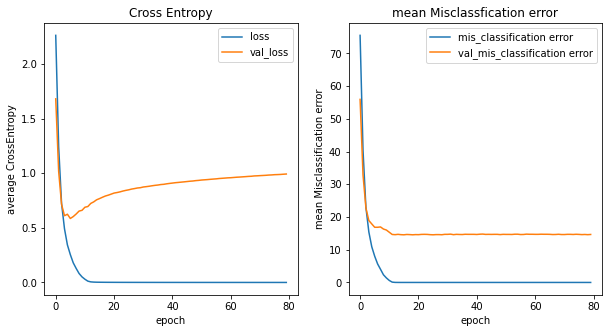

In this case, the misclassification error for vallidation and test set are 16.020000% and 12.760000% respectively.


In [115]:
np.random.seed(4)
sgd=keras.optimizers.SGD(learning_rate=0.1)
#create model
cnn = Sequential()
#add model layers
cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,56,1)))#kernel=3
cnn.add(MaxPooling2D(2, 2))
cnn.add(Flatten())
cnn.add(Dense(64, activation="relu"))
cnn.add(Dense(classes))
#compile model using accuracy to measure model performance
cnn.compile(optimizer=sgd, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[SparseCategoricalCrossentropy(),'accuracy'])
history=cnn.fit(X_train,Y_train,epochs=80,validation_data=(X_val,Y_val),verbose=0)
f,ax=plt.subplots(1,2,figsize=(14,7))
res=pd.DataFrame(history.history)
res[['mis_classification error','val_mis_classification error']]=(1-res[['accuracy','val_accuracy']])*100
res[['loss','val_loss']].plot(figsize=(15,5),ax=ax[0])
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('average CrossEntropy')
ax[0].set_title('Cross Entropy')
res[['mis_classification error','val_mis_classification error']].plot(figsize=(10,5),ax=ax[1])
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('mean Misclassification error')
ax[1].set_title('mean Misclassfication error')
plt.show()
pred = np.argmax(cnn.predict(X_test),axis=1)
err_cnn_1 = np.mean(pred!=Y_test)*100
print("In this case, the misclassification error for vallidation and test set are %3f"%
      (res['val_mis_classification error'][9])+'%', 'and %3f'%(err_cnn_1)+'% respectively.')

We can see the mean misclassification error is 12.76% which is far more than previous questions.We may see the training error decrease to 0 when epochs goes around 15 while test error is still  around 16%. As the result, we may conclude that this model performance good for training dataset, but not for generalization.

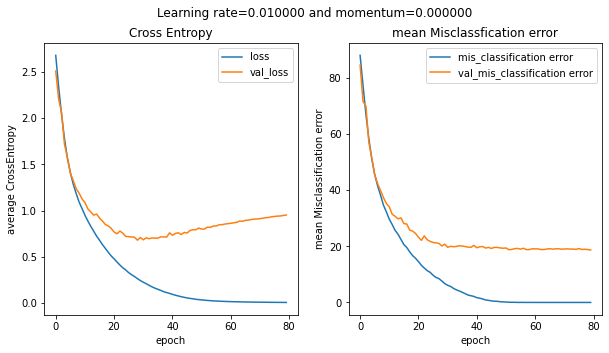

In this case, the misclassification error for vallidation and test set are 18.699998% and 17.300000% respectively.


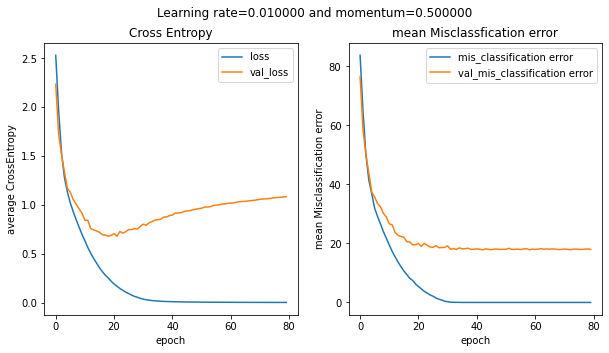

In this case, the misclassification error for vallidation and test set are 17.960000% and 16.960000% respectively.


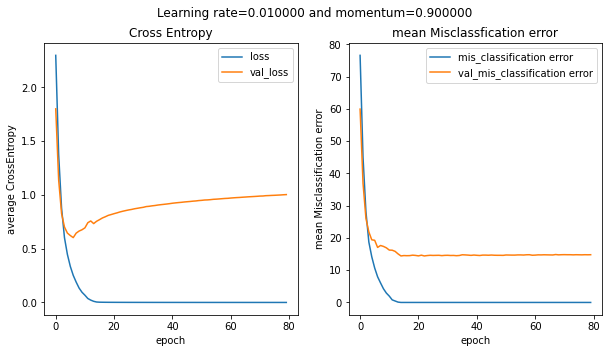

In this case, the misclassification error for vallidation and test set are 14.800000% and 13.880000% respectively.


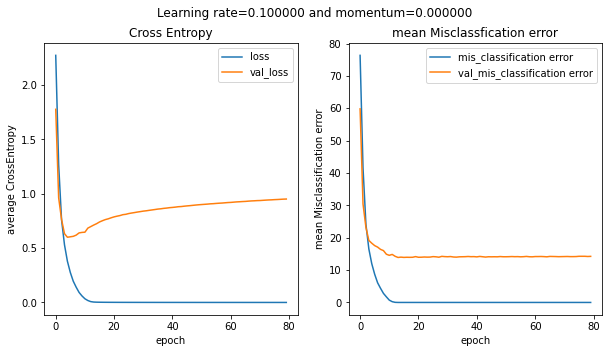

In this case, the misclassification error for vallidation and test set are 14.240003% and 13.100000% respectively.


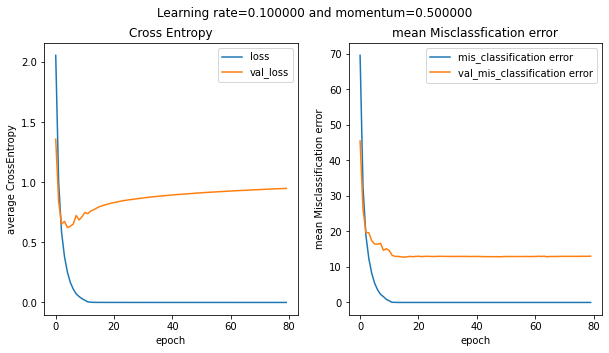

In this case, the misclassification error for vallidation and test set are 13.040000% and 12.320000% respectively.


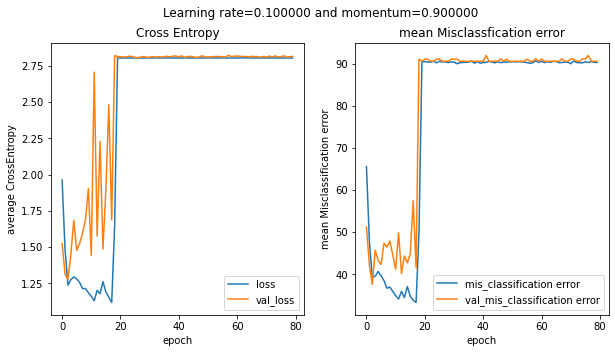

In this case, the misclassification error for vallidation and test set are 90.640000% and 89.300000% respectively.


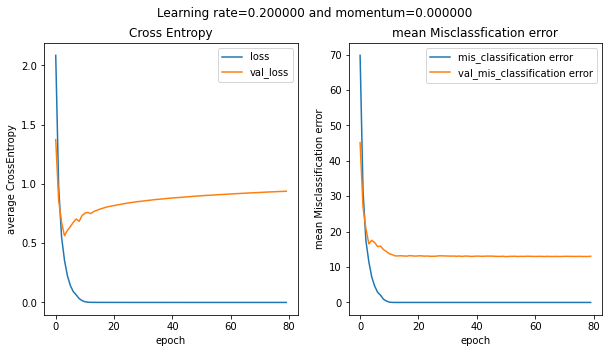

In this case, the misclassification error for vallidation and test set are 13.040000% and 11.740000% respectively.


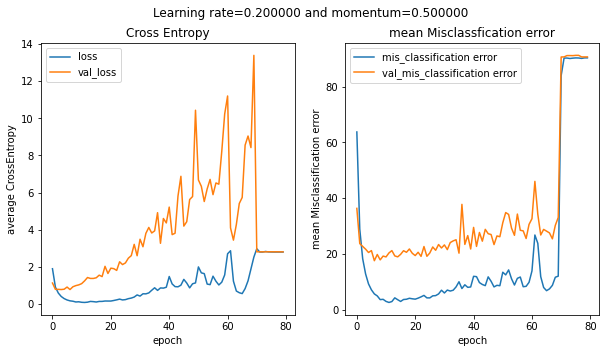

In this case, the misclassification error for vallidation and test set are 90.640000% and 89.300000% respectively.


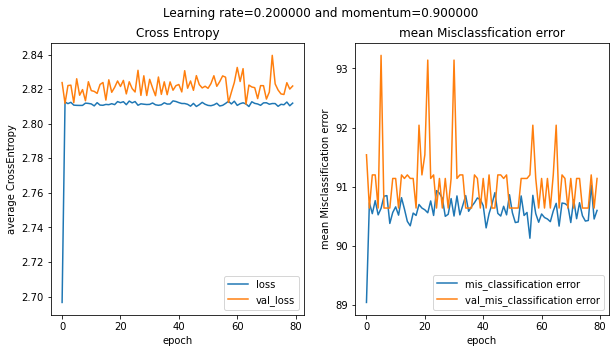

In this case, the misclassification error for vallidation and test set are 91.140000% and 90.980000% respectively.


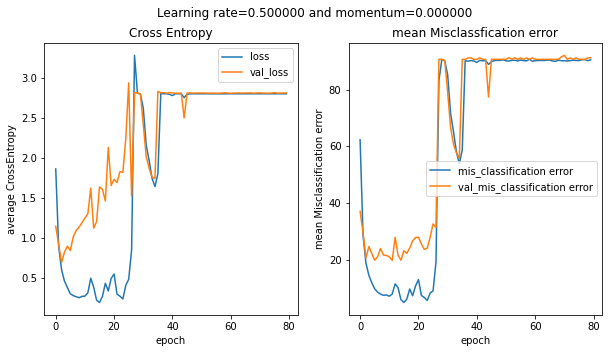

In this case, the misclassification error for vallidation and test set are 91.200000% and 91.180000% respectively.


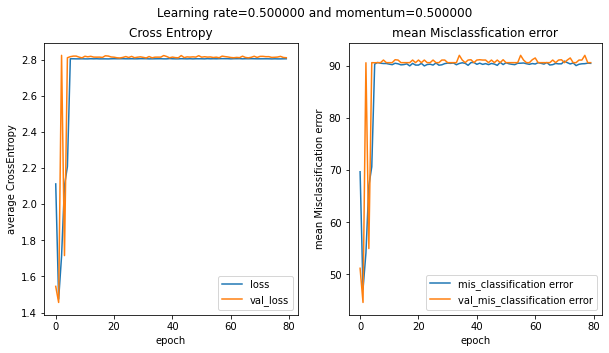

In this case, the misclassification error for vallidation and test set are 90.640000% and 89.300000% respectively.


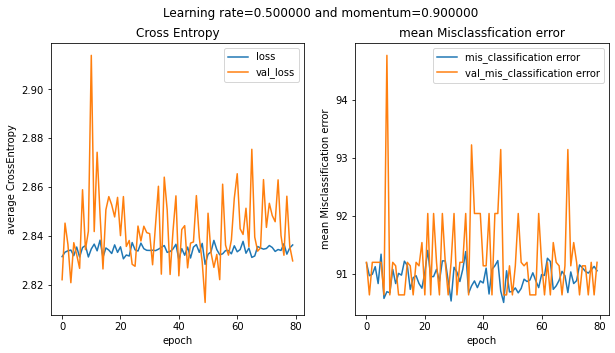

In this case, the misclassification error for vallidation and test set are 91.200000% and 91.180000% respectively.


In [25]:
for lr in [0.01,0.1,0.2,0.5]:
  for momentum in [0.0,0.5,0.9]:
    np.random.seed(4)
    sgd=keras.optimizers.SGD(learning_rate=lr,momentum=momentum)
    #create model
    cnn_1 = Sequential()
    #add model layers
    cnn_1.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,56,1)))
    cnn_1.add(MaxPooling2D(2, 2))
    cnn_1.add(Flatten())
    cnn_1.add(Dense(64, activation="relu"))
    cnn_1.add(Dense(classes))
    #compile model using accuracy to measure model performance
    cnn_1.compile(optimizer=sgd, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[SparseCategoricalCrossentropy(),'accuracy'])
    history=cnn_1.fit(X_train,Y_train,epochs=80,validation_data=(X_val,Y_val),verbose=0)
    f,ax=plt.subplots(1,2,figsize=(14,7))
    res=pd.DataFrame(history.history)
    res[['mis_classification error','val_mis_classification error']]=(1-res[['accuracy','val_accuracy']])*100
    res[['loss','val_loss']].plot(figsize=(15,5),ax=ax[0])
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('average CrossEntropy')
    ax[0].set_title('Cross Entropy')
    res[['mis_classification error','val_mis_classification error']].plot(figsize=(10,5),ax=ax[1])
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('mean Misclassification error')
    ax[1].set_title('mean Misclassfication error')
    f.suptitle('Learning rate=%2f and momentum=%2f'%(lr,momentum))
    plt.show()
    pred = np.argmax(cnn_1.predict(X_test),axis=1)
    err_cnn_1 = np.mean(pred!=Y_test)*100
    print("In this case, the misclassification error for vallidation and test set are %3f"%
        (res['val_mis_classification error'][79])+'%', 'and %3f'%(err_cnn_1)+'% respectively.')

From above parameter tuning process, we can see the best model is with parameter  {lr=0.2,momentum=0.0}
With the mean misclassfication error on validation and testing set 13.04% and 11.74% respectively. It is true that higher learning rate and momentum can help loss curve converge.However, if both of them are too high, it makes error unstable and divergent. Clearly, this result is still worse than 1.28% in question 4. Also, the visualization of the weight is shown below.

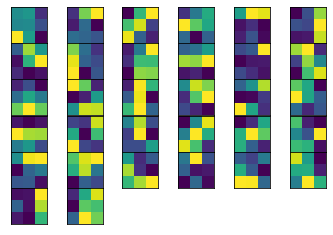

In [118]:
np.random.seed(4)
sgd=keras.optimizers.SGD(learning_rate=0.2,momentum=0.0)
#create model
cnn_1 = Sequential()
#add model layers
cnn_1.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,56,1)))
cnn_1.add(MaxPooling2D(2, 2))
cnn_1.add(Flatten())
cnn_1.add(Dense(64, activation="relu"))
cnn_1.add(Dense(classes))
#compile model using accuracy to measure model performance
cnn_1.compile(optimizer=sgd, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[SparseCategoricalCrossentropy(),'accuracy'])
history=cnn_1.fit(X_train,Y_train,epochs=80,validation_data=(X_val,Y_val),verbose=0)
W = cnn_1.layers[0].get_weights()[0].reshape(3,3,-1)
for i in range(W.shape[2]):
  plt.subplot(6,6,i+1)
  plt.imshow(W[:,:,i])
  plt.xticks([])
  plt.yticks([])
plt.subplots_adjust(wspace=0.01,hspace=0.01)
plt.show()

The weight from the best model seems good as it's either not too noisy or too correlated.

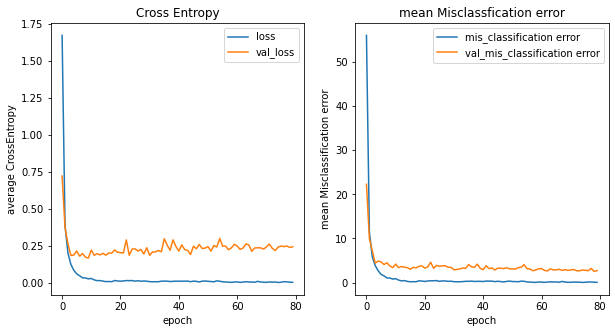

In this case, the misclassification error for vallidation and test set are 2.719998% and 2.900000% respectively.


In [26]:
np.random.seed(4)
sgd=keras.optimizers.SGD(learning_rate=0.1)
#create model
cnn = Sequential()
#add model layers
cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,56,1)))#kernel=3
cnn.add(MaxPooling2D(2, 2))
cnn.add(BatchNormalization())
cnn.add(Conv2D(64, (3,3), activation="relu"))#kernel=3
cnn.add(MaxPooling2D(2, 2))
cnn.add(BatchNormalization())
cnn.add(Conv2D(128, (3,3), activation="relu"))#kernel=3
cnn.add(Flatten())
cnn.add(layers.Dropout(0.2))
cnn.add(Dense(64, activation="relu"))
cnn.add(Dense(classes))
#compile model using accuracy to measure model performance
cnn.compile(optimizer=sgd, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[SparseCategoricalCrossentropy(),'accuracy'])
history=cnn.fit(X_train,Y_train,epochs=80,validation_data=(X_val,Y_val),verbose=0)
f,ax=plt.subplots(1,2,figsize=(14,7))
res=pd.DataFrame(history.history)
res[['mis_classification error','val_mis_classification error']]=(1-res[['accuracy','val_accuracy']])*100
res[['loss','val_loss']].plot(figsize=(15,5),ax=ax[0])
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('average CrossEntropy')
ax[0].set_title('Cross Entropy')
res[['mis_classification error','val_mis_classification error']].plot(figsize=(10,5),ax=ax[1])
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('mean Misclassification error')
ax[1].set_title('mean Misclassfication error')
plt.show()
pred = np.argmax(cnn.predict(X_test),axis=1)
err_cnn_1 = np.mean(pred!=Y_test)*100
print("In this case, the misclassification error for vallidation and test set are %3f"%
      (res['val_mis_classification error'][79])+'%', 'and %3f'%(err_cnn_1)+'% respectively.')

In this is case, we use 3 Conv2d in our model, and this time, the preformance is better than previous one. We can see the mean misclassification error of this case is around 2.7%, which is also more than that in question 5. We may see the training error decrease to 0 when epoch goes to around 15 while test error is still around 3%.

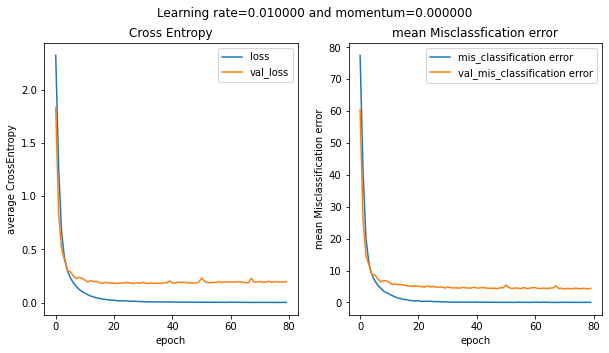

In this case, the misclassification error for validation and test set are 4.439998% and 3.900000% respectively.


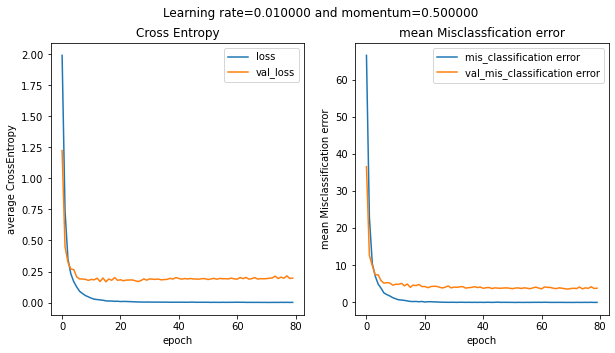

In this case, the misclassification error for validation and test set are 3.839999% and 3.100000% respectively.


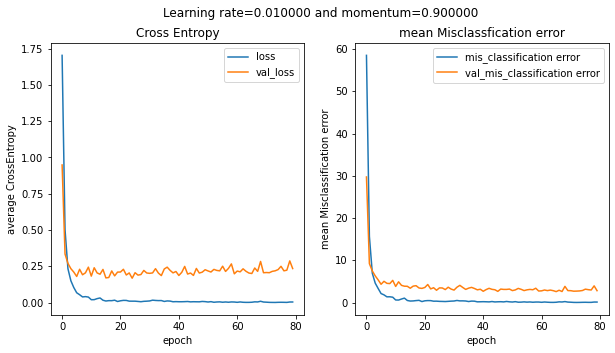

In this case, the misclassification error for validation and test set are 2.800000% and 2.880000% respectively.


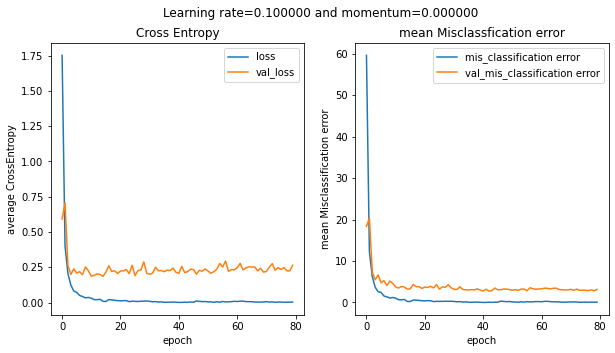

In this case, the misclassification error for validation and test set are 3.160000% and 2.900000% respectively.


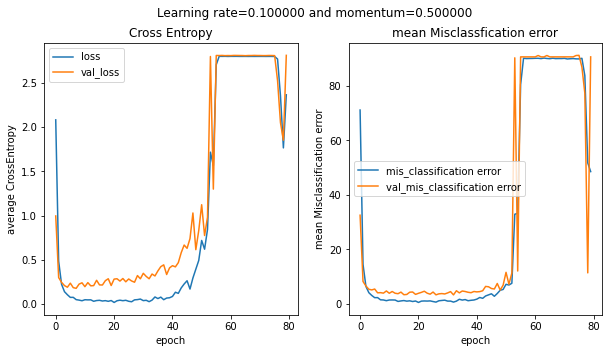

In this case, the misclassification error for validation and test set are 90.640000% and 89.300000% respectively.


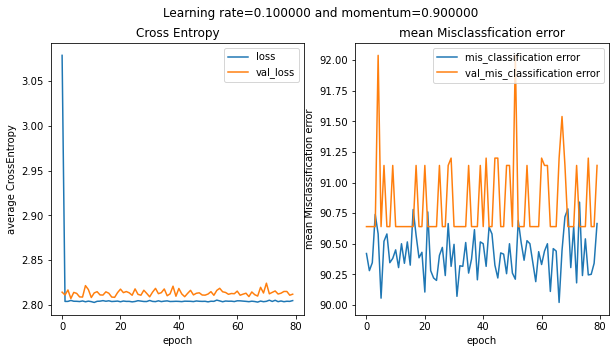

In this case, the misclassification error for validation and test set are 91.140000% and 90.980000% respectively.


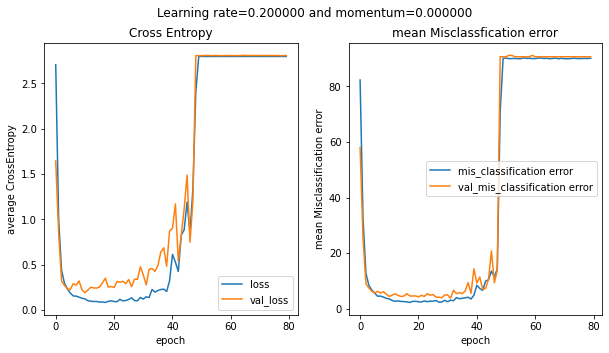

In this case, the misclassification error for validation and test set are 90.640000% and 89.300000% respectively.


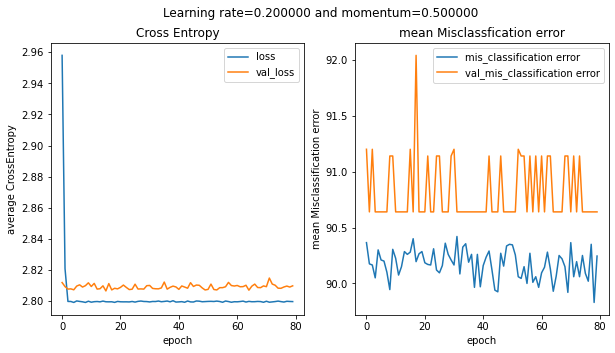

In this case, the misclassification error for validation and test set are 90.640000% and 89.300000% respectively.


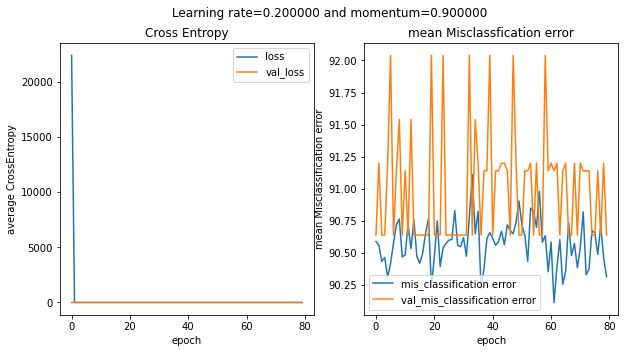

In this case, the misclassification error for validation and test set are 90.640000% and 89.300000% respectively.


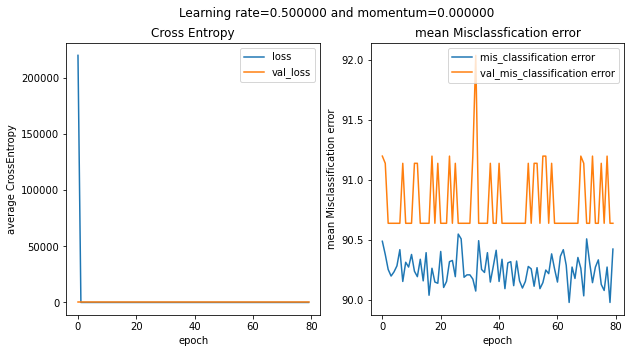

In this case, the misclassification error for validation and test set are 90.640000% and 89.300000% respectively.


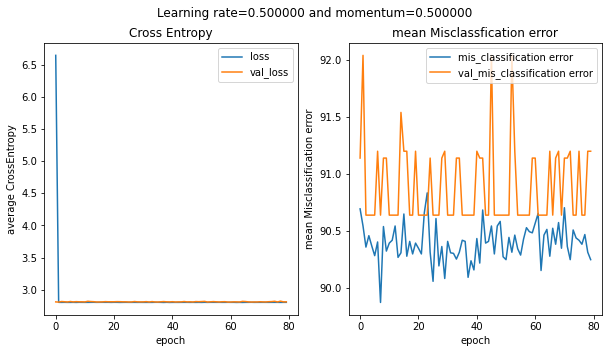

In this case, the misclassification error for validation and test set are 91.200000% and 91.180000% respectively.


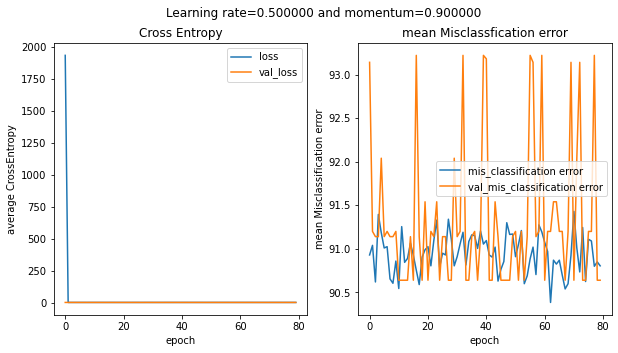

In this case, the misclassification error for validation and test set are 90.640000% and 89.300000% respectively.


In [29]:
for lr in [0.01,0.1,0.2,0.5]:
  for momentum in [0.0,0.5,0.9]:
    np.random.seed(4)
    sgd=keras.optimizers.SGD(learning_rate=lr,momentum=momentum)
    #create model
    cnn = Sequential()
    #add model layers
    cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,56,1)))
    cnn.add(MaxPooling2D(2, 2))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(64, (3,3), activation="relu"))
    cnn.add(MaxPooling2D(2, 2))
    cnn.add(BatchNormalization())
    cnn.add(Conv2D(128, (3,3), activation="relu"))
    cnn.add(Flatten())
    cnn.add(layers.Dropout(0.2))
    cnn.add(Dense(64, activation="relu"))
    cnn.add(Dense(classes))
    #compile model using accuracy to measure model performance
    cnn.compile(optimizer=sgd, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[SparseCategoricalCrossentropy(),'accuracy'])
    history=cnn.fit(X_train,Y_train,epochs=80,validation_data=(X_val,Y_val),verbose=0)
    f,ax=plt.subplots(1,2,figsize=(14,7))
    res=pd.DataFrame(history.history)
    res[['mis_classification error','val_mis_classification error']]=(1-res[['accuracy','val_accuracy']])*100
    res[['loss','val_loss']].plot(figsize=(15,5),ax=ax[0])
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('average CrossEntropy')
    ax[0].set_title('Cross Entropy')
    res[['mis_classification error','val_mis_classification error']].plot(figsize=(10,5),ax=ax[1])
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('mean Misclassification error')
    ax[1].set_title('mean Misclassfication error')
    f.suptitle('Learning rate=%2f and momentum=%2f'%(lr,momentum))
    plt.show()
    pred = np.argmax(cnn.predict(X_test),axis=1)
    err_cnn = np.mean(pred!=Y_test)*100
    print("In this case, the misclassification error for validation and test set are %3f"%
        (res['val_mis_classification error'][79])+'%', 'and %3f'%(err_cnn)+'% respectively.')

From the graph, even if higher momentum and learning rate will increase convergent rate, it makes the error very unstable. The high learning rate and momentum causes the network to jump out of the minimum and found another minimum that are worse local minimum. The error is lower than those when lr=0.2 and 0.5. Actually, if we control the momentum and only see the learning rate, we can see the convergence properties of this algorithm is when lr become larger (
lr>0.1 and momentum >0.5) the convergence may not hold as it fluctuates and the error goes up. As the result, I prefer to choose lr=0.01,momentum=0.9.

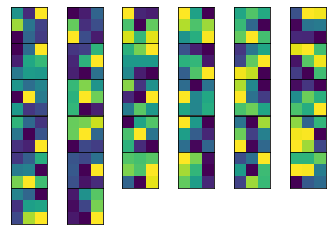

In [16]:
np.random.seed(4)
sgd=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
#create model
cnn = Sequential()
#add model layers
cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(28,56,1)))
cnn.add(MaxPooling2D(2, 2))
cnn.add(BatchNormalization())
cnn.add(Conv2D(64, (3,3), activation="relu"))
cnn.add(MaxPooling2D(2, 2))
cnn.add(BatchNormalization())
cnn.add(Conv2D(128, (3,3), activation="relu"))
cnn.add(Flatten())
cnn.add(layers.Dropout(0.2))
cnn.add(Dense(64, activation="relu"))
cnn.add(Dense(classes))
#compile model using accuracy to measure model performance
cnn.compile(optimizer=sgd, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[SparseCategoricalCrossentropy(),'accuracy'])
history=cnn.fit(X_train,Y_train,epochs=80,validation_data=(X_val,Y_val),verbose=0)
W = cnn.layers[0].get_weights()[0].reshape(3,3,-1)
for i in range(W.shape[2]):
  plt.subplot(6,6,i+1)
  plt.imshow(W[:,:,i])
  plt.xticks([])
  plt.yticks([])
plt.subplots_adjust(wspace=0.01,hspace=0.01)
plt.show()

This is the best model weight when lr=0.01,momentum=0.9. The weight from the best model seems good as it's either not too noisy or too correlated

From above, the best model is the second one
the generalization error:

lr=0.01, momentum=0:3.9%

lr=0.01,momentum=0.5:3.1%

lr=0.01,momentum=0.9:2.88%

lr=0.1,momentum=0:2.9%

lr=0.1,momentum=0.5:89.3%

lr=0.1,momentum=0.9:90.98%

lr=0.2,momentum=0:89.3%

lr=0.2,momentum=0.5:89.3%

lr=0.2,momentum=0.9:89.3%

lr=0.5,momentum=0:89.3%

lr=0.5,momentum=0.5:91.18%

lr=0.5,momentum=0.9,89.3%

Let's assume that the neural network perfectly figures out the summation relationship between the two digits and their labels,and these two digits are independence. The highest generalization error we get is 99.33% from part 4 with momentum=0.5,lr=0.1.The probability of two correct classification is 0.9933*0.9933=0.987.1-0.987=0.013>1%, as the result, if the assumption hold, we can not get test error rate lower than 1%

# Conclusion

Based on the MNIST dataset, we first did a series of machine learning methods to learn from handwritten digits and thus further predict handwritten digits.
We reproduce the methods offered in the paper and found some difference in the results between that in paper and what we did in this project. Overall speaking, SVM seem to perform better,but KNN performs worse. Then we did CNN by using Keras to outperform all algorithms above.
Then we continue with 3 deep learning method including 1 layer NN, CNN with 2 time convolution and CNN with 2 times convolution and batchnormalization on this dataset. For every method, we use cross entropy loss and miscalssification as metric for the algorithm, do parameter tuning for a best output and visualize the weights.
Based on upon algorithms, we also use a new dataset. Still, we use two algorithms to find better model. All results with best parameter sets in above analysis are listed below:

4.42% for KNN(n_neighbors=10)

4.01% for Adaboost(tree(max_depth=10),n_estimator=70)

1.6% for SVM(kernel='rbf',C=5)

0.89% for CNN by using 3 Conv2d layer

7.62% for 1_layer_NN(SGD(lr=0.1,momentum=0),seed=1,epoch=150)

1.25% for 2_Conv_CNN(SGD(lr=0.1,momentum=0.0),seed=4,epoch=80)

0.67% for 2_Conv_CNN with batch norm(SGD(lr=0.2,momentum=0.0),epoch=60)

# reference 


https://github.com/mdbloice/MNIST-Calculator/blob/main/MNIST-Calculator.ipynb